In [42]:
# Cargar Celda

class Node:
    def __init__(self, state, parent, g, f):
        self.state = state
        self.parent = parent
        self.g = g
        self.f = f

    def getParent(self):
        return self.parent

    def getState(self):
        return self.state

    def getG(self):
        return self.g

    def getF(self):
        return self.f

    def path(self):
        path = []

        parent = self
        while parent:
            path.append(parent.getState())
            parent = parent.getParent()
        path.reverse()

        return path
            
    def __repr__(self):
        return f"Estado Nodo: {str(self.getState())} \nF Nodo: {str(self.getF())}\n"
    
    def __lt__(self, o):
        return self.getF() < o.getF()
        

    def __eq__(self, o):
        return self.getState() == o.getState()

In [43]:
# Cargar Celda

import queue as queue

class Open():
    def __init__(self):
        self.priorityQueue = queue.PriorityQueue()

    def put(self, node):
        self.priorityQueue.put((node.getF(), node))

    def pop(self):
        return self.priorityQueue.get()

    def empty(self):
        return self.priorityQueue.empty()

    def getNode(self, state):
        for elem in self.priorityQueue.queue:
            node = elem[1]
            if node.getState() == state:
                return node
        return None

    def getNodes(self):
        return [x[1] for x in self.priorityQueue.queue]

    def update(self, oldNode, newNode):
        self.priorityQueue.queue.remove((oldNode.getF(), oldNode))
        self.put(newNode)

    def __str__(self):
        return str(self.priorityQueue.queue)


In [44]:
# Cargar Celda

def AStar(initial, successorsF, goalF, heuristicF):
    open = Open()
    open.put(initial)
    closed = {}

    while open:
        f, current = open.pop()
        #print(f"F -> {f}\nActual -> {current}")
        closed[current.getState()] = current

        if goalF(current):
            return current.path()

        successors = successorsF(current, heuristicF)
        #print(f"Sucesores -> {successors}")
        #print("-" * 90)

        for suc in successors:
            suc_open = open.getNode(suc.getState())
            suc_closed = closed.get(suc.getState())

            if not (suc_open or suc_closed):
                open.put(suc)
            elif suc_open and suc.getF() < suc_open.getF():
                open.update(suc_open, suc)
            elif suc_closed and suc.getF() < suc_closed.getF():
                closed.pop(suc.getState())
                open.put(suc)

    return [] # No solución.


los hijos del nodo 1 son:
[2, 3]


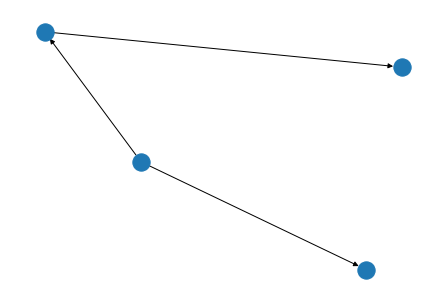

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

# Creo el grafo
Gprueba = nx.DiGraph()

# Escribo el nombre del nodo, como argumento
Gprueba.add_node(1)    
Gprueba.add_node(2)    
Gprueba.add_node(3)    

# Escribo los nombres de los nodos que forman el arco, como argumento(s)
Gprueba.add_edge(1,2)
Gprueba.add_edge(1,3)
Gprueba.add_edge(2,4)

# Consulto los hijos del nodo 1. El grafo "G" funciona como un diccionario
print("los hijos del nodo 1 son:")
print(list(Gprueba[1].keys()))


nx.draw(Gprueba)

Grafo similar al de 'Teoría', para A*


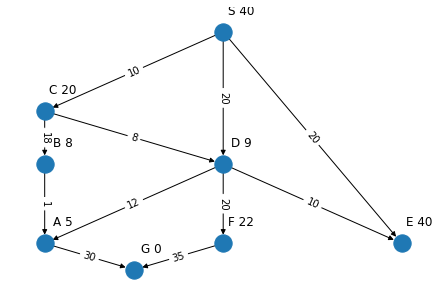

In [46]:
Graph = nx.DiGraph()

# Este diccionario almacena los hijos que tiene cada padre
childs = {'S': 'CDE', 'C': 'BD', 'B': 'A', 'D': 'AFE', 'A': 'G', 'F': 'G'}

# Este diccionario almacena los costes de cada camino
costs = {('S', 'C'): 10, ('S', 'D'): 20, ('S', 'E'): 20, ('C', 'B'): 18,
         ('C', 'D'):  8, ('B', 'A'):  1, ('D', 'A'): 12, ('D', 'F'): 20,
         ('D', 'E'): 10, ('A', 'G'): 30, ('F', 'G'): 35}

# Este diccionario almacena los valores heurísticos de cada estado.
heuristic = {'S': 40, 'C': 20, 'B': 8, 'D': 9, 'A': 5, 'F': 22, 'E': 40, 'G': 0}

# Este diccionario almacena las posiciones de cada nodo. Sólo es a efectos estéticos.
positions = {'S':(20,100), 'C':(10,70),
             'B':(10,50),  'D':(20,50),
             'A':(10,20),  'F':(20,20),
             'E':(30,20),  'G':(15,10)}

# Se crea el grafo, y se añaden: (1) nodos y (2) arcos
node_labels={}
for node in heuristic:
    Graph.add_node(node)
    node_labels[node] = f"{node} {str(heuristic[node])}"
    if node in childs:
        for child in childs[node]:
            Graph.add_edge(node, child) 

# Se dibuja el grafo
nx.draw(Graph, pos=positions)
# Se dibujan las etiquetas de los nodos y los arcos
node_label_pos = {k:[v[0]+1,v[1]+8] for k,v in positions.items()}
node_label_handles = nx.draw_networkx_labels(Graph, pos=node_label_pos, labels=node_labels)
nx.draw_networkx_edge_labels(Graph, pos=positions, edge_labels=costs)
print("Grafo similar al de 'Teoría', para A*")

In [47]:
initialNode = Node('S', None, 0, heuristic['S'])

def successorsGraph(node, heuristicF):
    state = node.getState()
    g = node.getG()
    childs = []
    
    for child in Graph[state].keys():
        newG = g + costs[(state, child)]
        h = heuristicF(child)
        
        childs.append(Node(child, node, newG, newG + h))
        
    return childs

def goalGraph(node):
    state = node.getState()
    return state == 'G' 

def heuristicGraph(state):
    return heuristic[state]                

print(heuristicGraph('S'))
print(goalGraph(initialNode))
print(successorsGraph(initialNode, heuristicGraph))
    

40
False
[Nodo: C (30), Nodo: D (29), Nodo: E (60)]


In [48]:
AStar(initialNode, successorsGraph, goalGraph, heuristicGraph)

F -> 40
Actual -> Nodo: S (40)
Sucesores -> [Nodo: C (30), Nodo: D (29), Nodo: E (60)]
------------------------------------------------------------------------------------------
F -> 29
Actual -> Nodo: D (29)
Sucesores -> [Nodo: A (37), Nodo: F (62), Nodo: E (70)]
------------------------------------------------------------------------------------------
F -> 30
Actual -> Nodo: C (30)
Sucesores -> [Nodo: B (36), Nodo: D (27)]
------------------------------------------------------------------------------------------
F -> 27
Actual -> Nodo: D (27)
Sucesores -> [Nodo: A (35), Nodo: F (60), Nodo: E (68)]
------------------------------------------------------------------------------------------
F -> 35
Actual -> Nodo: A (35)
Sucesores -> [Nodo: G (60)]
------------------------------------------------------------------------------------------
F -> 36
Actual -> Nodo: B (36)
Sucesores -> [Nodo: A (34)]
------------------------------------------------------------------------------------------
F 

['S', 'C', 'B', 'A', 'G']

In [49]:
from IPython.display import display
import pandas as pd
import numpy as np

debugData = []

columns = ["Actual","Abiertos", "Sucesores", "Cerrados"]
debugData.append(["Nodo actual",
                  str(list(range(1,20))),
                  str(["suc1","suc2","suc3"]),
                  str(list(range(1,20)))])

pd.DataFrame(np.array(debugData), columns=columns)

,Actual,Abiertos,Sucesores,Cerrados
0,Nodo actual,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","['suc1', 'suc2', 'suc3']","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


# PATHFINDING

In [50]:
# Cargar Celda

board = [[1, 1, 1, 1, 1, 1, 1, 1],
         [1, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 1, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 1, 1, 1],
         [1, 1, 1, 0, 1, 0, 0, 1],
         [1, 0, 1, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 1, 1, 1, 1]]

initialStatePF = (1, 1)
finalStatePF = (5, 6)

In [51]:
# Cargar Celda

movements = ((1, 0), (-1, 0), (0, 1), (0, -1))

def isGoal(node):
    return node.getState() == finalStatePF

def isValid(state):
    x, y = state
    return 0 <= x < len(board) and 0 <= y < len(board[0]) and board[x][y] == 0

def heuristicPF(state):
    x, y = state
    finalX, finalY = finalStatePF
    return abs(x - finalX) + abs(y - finalY)

def successorsPF(node, heuristicPF):
    childs = []
    x, y = node.getState()

    for mov in movements:
        current = (x + mov[0], y + mov[1])

        if isValid(current):
            new_g = node.getG() + 1
            new_f = new_g + heuristicPF(current)

            childs.append(Node(current, node, new_g, new_f))

    return childs

In [52]:
# Cargar Celda

def createInitialNodePF(initialState, finalState, newBoard, heuristic):
    global finalStatePF
    global board
    
    finalStatePF = finalState
    board = newBoard
    return Node(initialState, None, 0, heuristic(initialState))

In [56]:
initialNodePF = createInitialNodePF(initialStatePF, finalStatePF, board, heuristicPF)

sol = AStar(initialNodePF, successorsPF, isGoal, heuristicPF)

F -> 9
Actual -> Nodo: (1, 1) (9)
Sucesores -> [Nodo: (2, 1) (9), Nodo: (1, 2) (9)]
------------------------------------------------------------------------------------------
F -> 9
Actual -> Nodo: (2, 1) (9)
Sucesores -> [Nodo: (3, 1) (9), Nodo: (1, 1) (11)]
------------------------------------------------------------------------------------------
F -> 9
Actual -> Nodo: (1, 2) (9)
Sucesores -> [Nodo: (1, 3) (9), Nodo: (1, 1) (11)]
------------------------------------------------------------------------------------------
F -> 9
Actual -> Nodo: (3, 1) (9)
Sucesores -> [Nodo: (2, 1) (11)]
------------------------------------------------------------------------------------------
F -> 9
Actual -> Nodo: (1, 3) (9)
Sucesores -> [Nodo: (1, 4) (9), Nodo: (1, 2) (11)]
------------------------------------------------------------------------------------------
F -> 9
Actual -> Nodo: (1, 4) (9)
Sucesores -> [Nodo: (2, 4) (9), Nodo: (1, 5) (9), Nodo: (1, 3) (11)]
------------------------------------